train.shape=(46, 7), test.shape=(12, 7)
0.10661241949720279


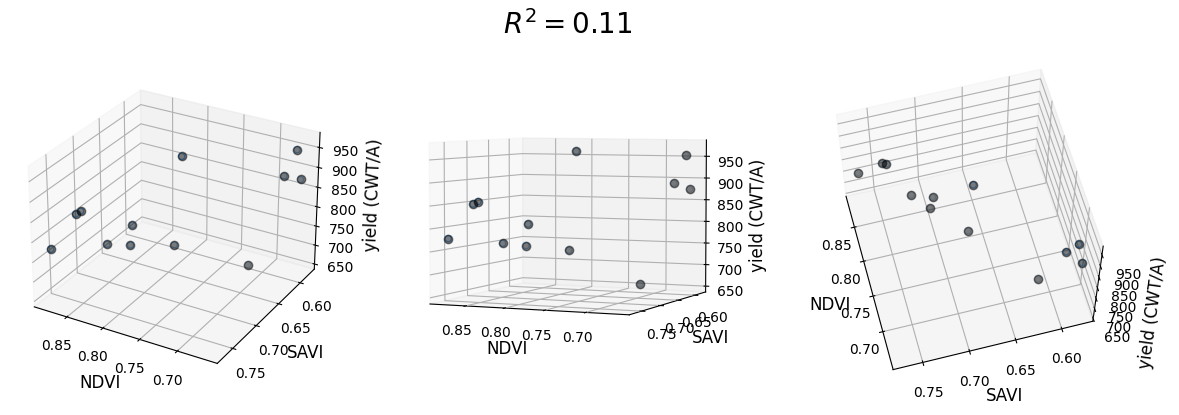

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path


# code from 'aegis4048.github.io', modified for VI and yield

######################################## Data preparation #########################################

# data path
df_path = (
    Path.cwd()
    / "data"
    / "raw"
    / "Jun22_2020"
    / "df3_fertsplit.csv"
)
df = pd.read_csv(df_path)

train, test = train_test_split(df, test_size=0.2, shuffle = True)

# X = df[['NDVI_mean', 'SAVI_mean']].values.reshape(-1,2)
X_train = train.iloc[:,8:15].values
y_train = train['yield']

X_test = test.iloc[:,8:15].values
y_test = test['yield']

print(f"train.shape={X_train.shape}, test.shape={X_test.shape}")

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X_train, y_train)
predicted = model.predict(X_test)

############################################## Evaluate ############################################

r2 = model.score(X_test, y_test)
print(r2)
############################################## Plot ################################################
x = X_test[:,0]
y = X_test[:,1]
z = predicted
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(x, y, predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('NDVI', fontsize=12)
    ax.set_ylabel('SAVI', fontsize=12)
    ax.set_zlabel('yield (CWT/A)', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

# ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax1.transAxes, color='grey', alpha=0.5)
# ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax2.transAxes, color='grey', alpha=0.5)
# ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#            transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

